# Looking at target distribution

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('../input/train.csv')
print(train.shape)
train.head()

(33126, 8)


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [3]:
train['target'].value_counts(normalize=True) * 100

0    98.237034
1     1.762966
Name: target, dtype: float64

In [4]:
test = pd.read_csv('../input/test.csv')
print(test.shape)
test.head()

(10982, 5)


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [5]:
train_folds = pd.read_csv('../input/train_folds_stratified.csv')
print(train_folds.shape)
train_folds.groupby('kfold')['target'].value_counts(normalize=True) * 100

(33126, 9)


kfold  target
-1.0   0         98.219674
       1          1.780326
 0.0   0         98.239141
       1          1.760859
 1.0   0         98.239141
       1          1.760859
 2.0   0         98.238846
       1          1.761154
 3.0   0         98.238846
       1          1.761154
 4.0   0         98.238846
       1          1.761154
Name: target, dtype: float64

In [6]:
train_folds = pd.read_csv('../input/train_folds_groups.csv')
print(train_folds.shape)
train_folds.groupby('kfold')['target'].value_counts(normalize=True) * 100

(33126, 9)


kfold  target
-1.0   0         98.249849
       1          1.750151
 0.0   0         98.423612
       1          1.576388
 1.0   0         98.473923
       1          1.526077
 2.0   0         98.054344
       1          1.945656
 3.0   0         97.903388
       1          2.096612
 4.0   0         98.322710
       1          1.677290
Name: target, dtype: float64

# Plots, wide EDA, etc.

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
rc('mathtext',**{'default':'regular'})
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-whitegrid')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

In [8]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

anatom_site_general_challenge_tr = {'oral/genital': 'Полость/Гениталии',
                                    'palms/soles': 'Ладонь/Подошва',
                                    'head/neck': 'Голова/Шея',
                                    'upper extremity': 'Верхняя конечность',
                                    'lower extremity': 'Нижняя конечность',
                                    'torso': 'Туловище'}
train['anatom_site_general_challenge'] = train['anatom_site_general_challenge'].map(anatom_site_general_challenge_tr)
test['anatom_site_general_challenge'] = test['anatom_site_general_challenge'].map(anatom_site_general_challenge_tr)

benign_malignant_tr = {'benign': 'Доброкачественная', 'malignant': 'Злокачественная'}
train['benign_malignant'] = train['benign_malignant'].map(benign_malignant_tr)

In [9]:
train['target'].value_counts()

0    32542
1      584
Name: target, dtype: int64

In [10]:
train.groupby('patient_id')['sex'].first().value_counts(), test.groupby('patient_id')['sex'].first().value_counts()

(male      1077
 female     977
 Name: sex, dtype: int64,
 male      364
 female    326
 Name: sex, dtype: int64)

In [11]:
data = train['anatom_site_general_challenge'].value_counts(normalize=True).sort_values().values
labels = train['anatom_site_general_challenge'].value_counts(normalize=True).sort_values().index

In [12]:
def stylize_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.xaxis.set_tick_params(top='off', direction='out', width=1)
    ax.yaxis.set_tick_params(right='off', direction='out', width=1)
    ax.grid(False)

In [13]:
site_vs_diagnosis = train.groupby(['anatom_site_general_challenge', 'benign_malignant']).count()['patient_id']
site_vs_diagnosis

anatom_site_general_challenge  benign_malignant 
Верхняя конечность             Доброкачественная     4872
                               Злокачественная        111
Голова/Шея                     Доброкачественная     1781
                               Злокачественная         74
Ладонь/Подошва                 Доброкачественная      370
                               Злокачественная          5
Нижняя конечность              Доброкачественная     8293
                               Злокачественная        124
Полость/Гениталии              Доброкачественная      120
                               Злокачественная          4
Туловище                       Доброкачественная    16588
                               Злокачественная        257
Name: patient_id, dtype: int64

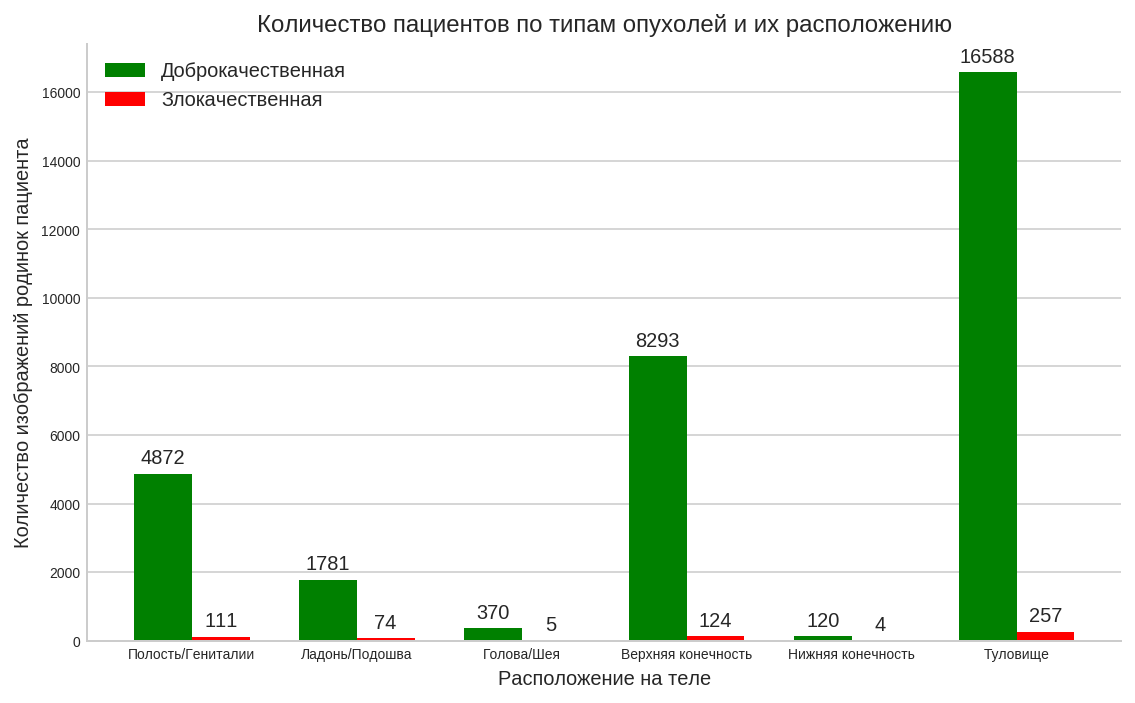

In [14]:
site_vs_diagnosis = train.groupby(['anatom_site_general_challenge', 'benign_malignant']).count()['patient_id'].tolist()
labels = train['anatom_site_general_challenge'].value_counts(normalize=True).sort_values().index
benign_data = site_vs_diagnosis[0:12:2]
maglignant_data = site_vs_diagnosis[1:12:2]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize = (8,5))
rects1 = ax.bar(x - width/2, benign_data, width, label=benign_malignant_tr['benign'], color='g')
rects2 = ax.bar(x + width/2, maglignant_data, width, label=benign_malignant_tr['malignant'], color='r')
ax.set_ylabel('Количество изображений родинок пациента')
ax.set_xlabel('Расположение на теле')
ax.set_title('Количество пациентов по типам опухолей и их расположению')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
stylize_axes(ax)
ax.grid(True, axis='y')

fig.tight_layout()
fig.savefig('../plots/patients_target_site.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

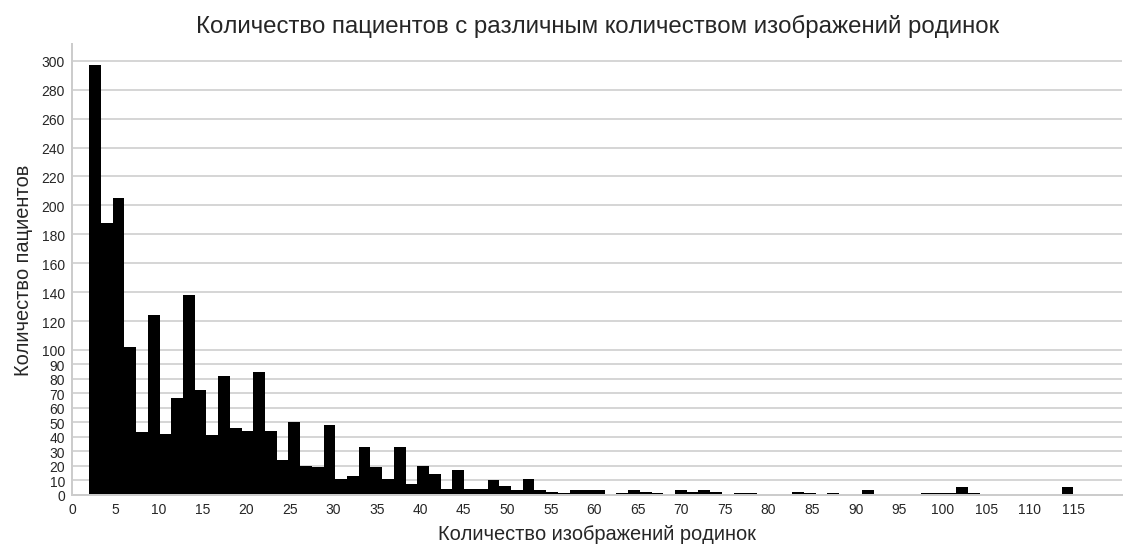

In [15]:
fig, ax = plt.subplots(figsize = (8,4))
image_freq_per_patient = train.groupby(['patient_id']).size()
ax.hist(image_freq_per_patient, 
        image_freq_per_patient.nunique(), color='black')
ax.set_title('Количество пациентов с различным количеством изображений родинок')
ax.set_xlabel('Количество изображений родинок')
ax.set_ylabel('Количество пациентов')
ax.set_xticks(range(0, 120, 5))
ax.set_yticks(list(range(0, 100, 10)) + list(range(100, 310, 20)))
ax.set_xlim(0)
stylize_axes(ax)
ax.grid(True, axis='y')
fig.tight_layout()
fig.savefig('../plots/pic_per_pacient.png', dpi=300, bbox_inches='tight', transparent=True)

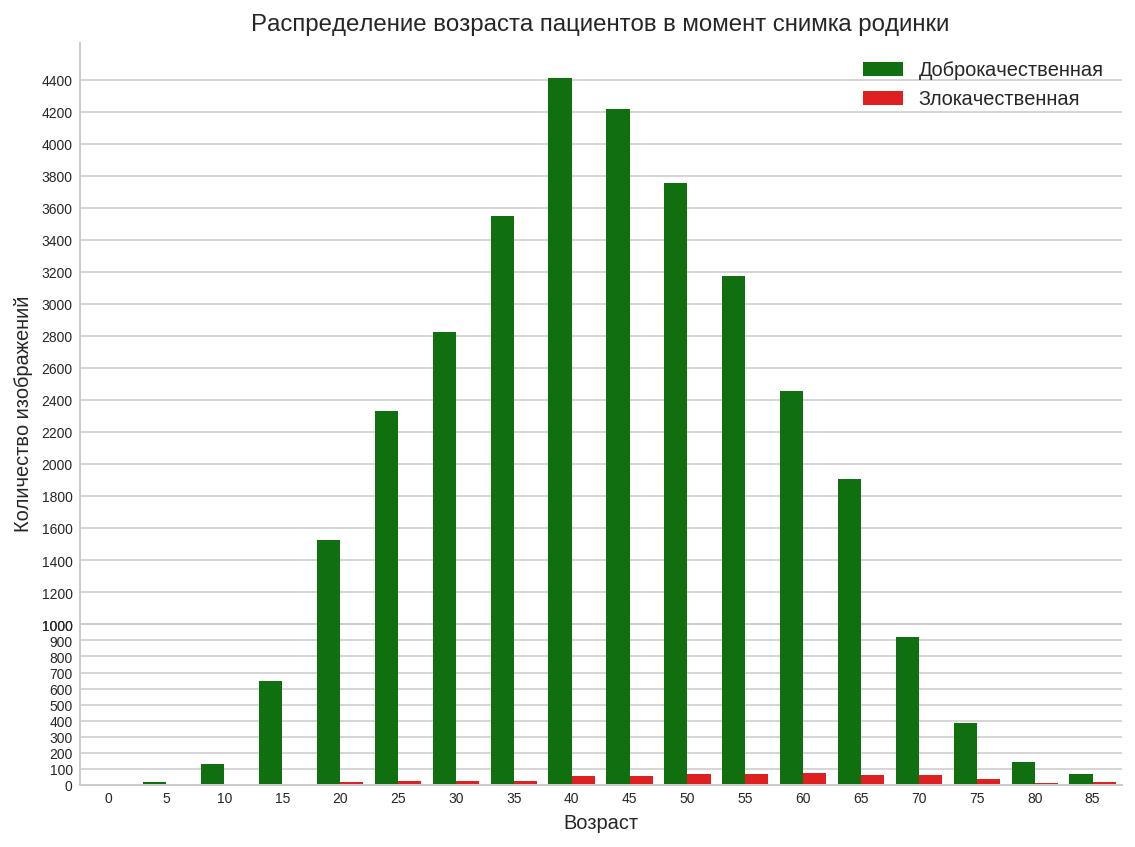

In [16]:
fig, ax = plt.subplots(figsize = (8,6))

sns.countplot(train['age_approx'], hue=train['benign_malignant'], palette=['g', 'r'], ax=ax)
stylize_axes(ax)
ax.legend()
ax.set_yticks(list(range(0, 1050, 100)) + list(range(1000, 4600, 200)))
ax.grid(True, axis='y')

ax.set_title('Распределение возраста пациентов в момент снимка родинки')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество изображений')
ax.set_xticklabels([str(x*5) for x in ax.get_xticks()])
fig.tight_layout()
fig.savefig('../plots/age_distr.png', dpi=300, bbox_inches='tight', transparent=True)

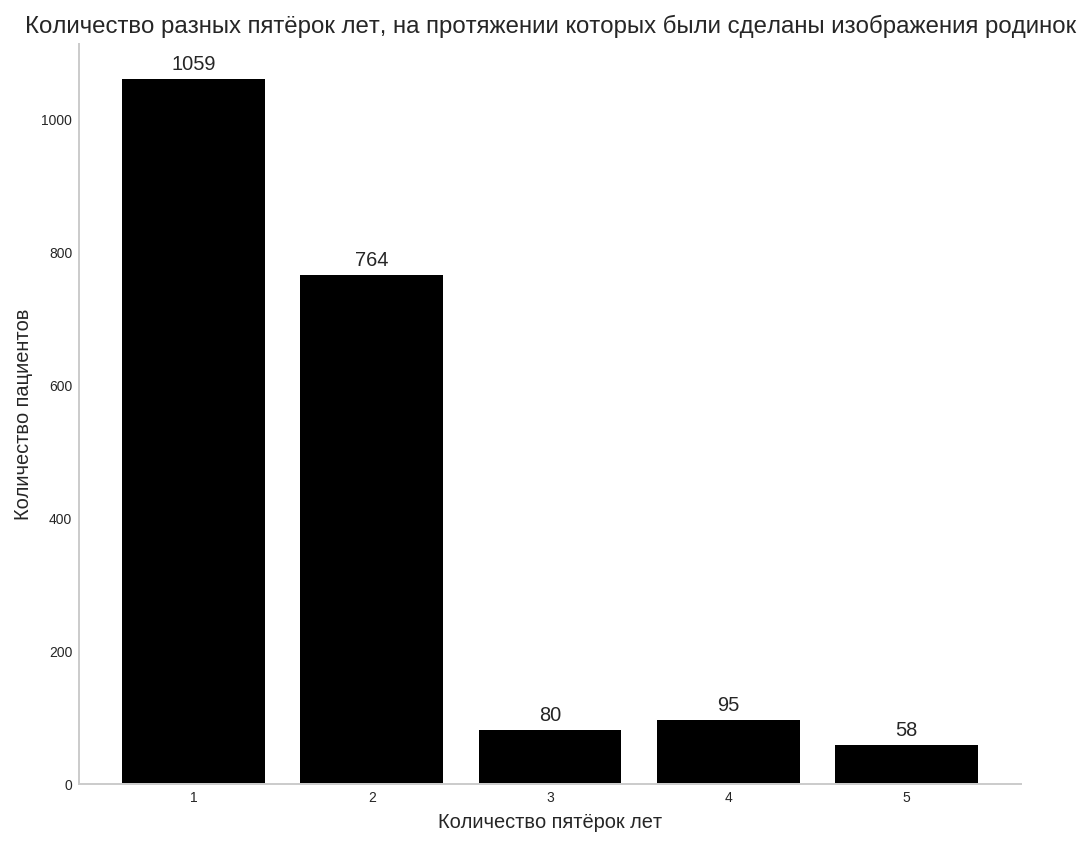

In [17]:
fig, ax = plt.subplots(figsize = (8,6))

width = 0.35

rects = ax.bar(train.groupby(['patient_id'])['age_approx'].nunique().value_counts().index, 
               train.groupby(['patient_id'])['age_approx'].nunique().value_counts().values, color='k')
ax.set_title('Количество разных пятёрок лет, на протяжении которых были сделаны изображения родинок')
ax.set_ylabel('Количество пациентов')
ax.set_xlabel('Количество пятёрок лет')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects)
stylize_axes(ax)
fig.tight_layout()
fig.savefig('../plots/nuniq_age_per_patient.png', dpi=300, bbox_inches='tight', transparent=True)

In [18]:
train.groupby(['patient_id']).size()

patient_id
IP_0001230     6
IP_0019713    13
IP_0036322     5
IP_0038436     3
IP_0038545    28
              ..
IP_9989332    10
IP_9992027    39
IP_9995095    14
IP_9996429     3
IP_9997715    11
Length: 2056, dtype: int64

In [19]:
train.groupby(['patient_id']).size().mean()

16.111867704280154

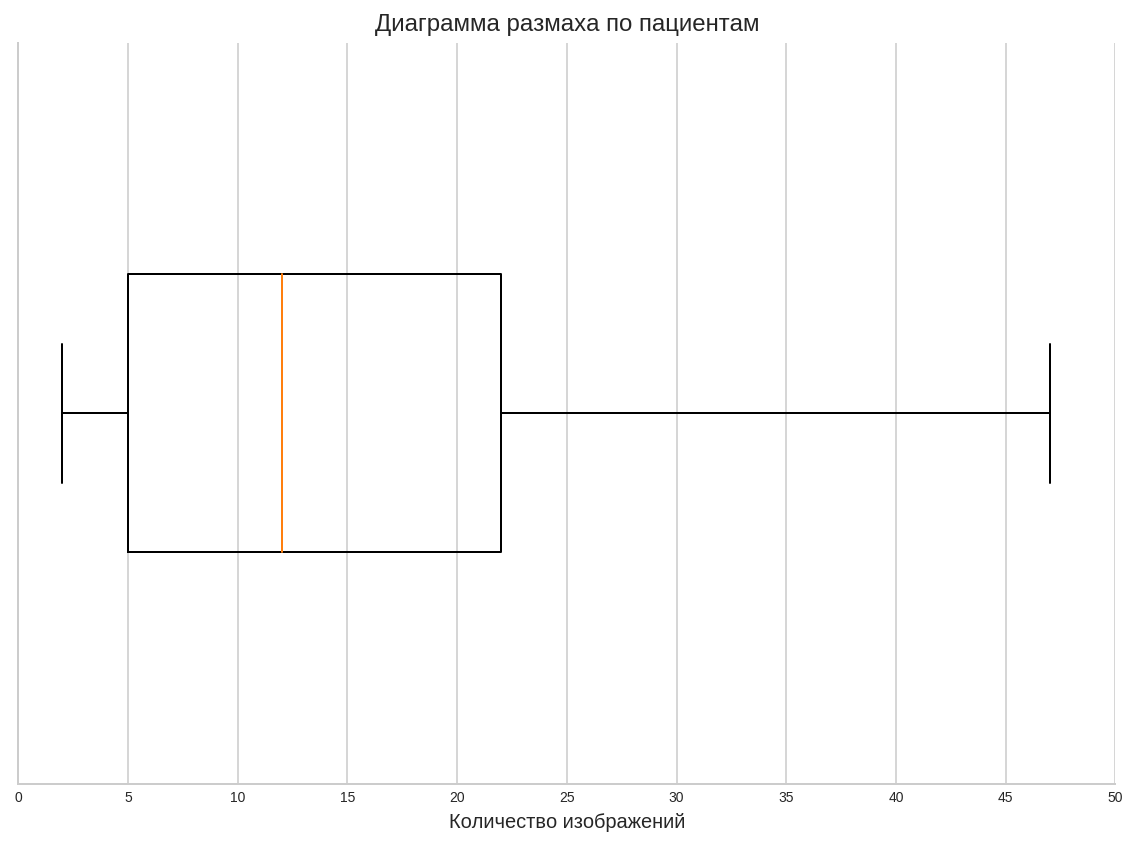

In [20]:
fig, ax = plt.subplots(figsize=(8,6))

ax.boxplot(train.groupby(['patient_id']).size(), showfliers=False, vert=False)
stylize_axes(ax)

ax.set_title('Диаграмма размаха по пациентам')
ax.set_xlabel('Количество изображений')

ax.set_xlim(0)
ax.set_ylim(0.8, 1.2)
ax.set_xticks(range(0, 55, 5))
ax.set_yticks([])
ax.grid(True, axis='x')

fig.tight_layout()
fig.savefig('../plots/npics_per_patient_boxplot.png', dpi=300, bbox_inches='tight', transparent=True)